# Data Exploration

This notebook describes three tables in database.sqlite


*   FBI NICS Firearm Background Checks
*   Firearm Mortality by State
*   FBI Crime Data


# FBI Crime Data

## Data overview

The dataset is sourced from the FBI's Centers for Crime Data Explorer. It contains crime statistics across the United States, including detailed factors associated with the crimes, such as “Type of Weapon Involved by Offense”, “Offense Linked to Another Offense”, and others.

This dataset provides valuable insights into crime rates across different U.S. states and helps to identify the factors contributing to various types of offenses.

Some hints:
*   to know the range of year
*   cdc_df["YEAR"].describe()
```
crimes_data_unique_years = crimes_df["year"].unique()
print(crimes_data_unique_years)
```

*   Result: Range of year = **1979 - 2022**



In [11]:
import sqlite3
import pandas as pd

# ========== 1. Read crimes_data ==========
with sqlite3.connect("cleaned_crimes_dataset.sqlite") as conn:
    crimes_df = pd.read_sql_query("""
        SELECT
            CAST(year AS INT) AS year,
            state_abbr,
            state_name,
            population,
            violent_crime,
            homicide,
            aggravated_assault,
            property_crime
        FROM crimes_data
    """, conn)

crimes_df["totals"] = (
    crimes_df["violent_crime"]
    + crimes_df["homicide"]
    + crimes_df["aggravated_assault"]
    + crimes_df["property_crime"]
)

crimes_df.head(15)

,year,state_abbr,state_name,population,violent_crime,homicide,aggravated_assault,property_crime,totals
0,1979,AK,alaska,406000,1994,54,1203,23193,26444
1,1979,CA,california,22696000,184087,2952,93129,1511021,1791189
2,1979,MA,massachusetts,5769000,30650,212,17286,310756,358904
3,1979,NY,new york,17649000,161906,2092,60949,933234,1158181
4,1979,TX,texas,13385000,67988,2235,34043,725109,829375
5,1979,WY,wyoming,450000,1579,41,1224,20129,22973
6,1980,AK,alaska,440142,1919,39,1270,22930,26158
7,1980,CA,california,23532680,210290,3411,102766,1633042,1949509
8,1980,MA,massachusetts,5728288,34444,232,19158,313787,367621
9,1980,NY,new york,17506690,180235,2228,60329,1029749,1272541


# Firearm Mortality by State

## Data overview
The dataset is sourced from the Centers for Disease Control
and Prevention (CDC). It provides firearm mortality statistics at the state level across the United States, including annual data on deaths resulting from firearm-related incidents. The data includes information such as the number of
firearm-related deaths, categorized by state and year.

This dataset is a crucial source for understanding trends in firearmrelated
mortality.

Some hints:
*   Some information:
`cdc_df.shape` -> (60, 4)

```
unique_years = cdc_df["YEAR"].unique()
print(unique_years)
```
-> **Range of years = 2014 - 2022**


In [12]:
# Read cleaned_cdc_dataset.sqlite
with sqlite3.connect("cleaned_cdc_dataset.sqlite") as conn:
    mortality_df = pd.read_sql_query("SELECT * FROM cdc_data", conn)

mortality_df.head(30)

,YEAR,STATE,RATE,DEATHS
0,2022,AK,22.4,164
1,2022,CA,8.6,3484
2,2022,MA,3.7,263
3,2022,NY,5.3,1044
4,2022,TX,15.3,4630
5,2022,WY,20.4,124
6,2021,AK,25.2,182
7,2021,CA,9.0,3576
8,2021,MA,3.4,247
9,2021,NY,5.4,1078


# FBI NICS Firearm Background Checks

## Data overview
*  The dataset is sourced from Kaggle and originally provided by the National Instant Criminal Background Check System (NICS). It contains **the number of FBI NICS firearm background checks by month, state, and type from November 1998 to 2023.**
*  This dataset provides insights into the stringency of firearm restrictions across different states, as it includes mandatory background checks for citizens wishing to purchase firearms.

In [13]:
# ========== 2. Read kaggle_data/ permit_df ==========
with sqlite3.connect("cleaned_kaggle_dataset.sqlite") as conn:
    permit_df = pd.read_sql_query(
        """
        SELECT
            year,
            state,
            permit,
            handgun,
            long_gun,
            multiple,
            totals
        FROM kaggle_data
        """,
        conn
    )

permit_df.head(15)

,year,state,permit,handgun,long_gun,multiple,totals
0,1998,alaska,4.0,1365.0,2555.0,61,3985
1,1998,california,5366.0,28641.0,33438.0,0,67445
2,1998,massachusetts,0.0,321.0,1116.0,6,1443
3,1998,new york,1068.0,1094.0,12513.0,12,14736
4,1998,texas,5324.0,23862.0,52248.0,963,82399
5,1998,wyoming,121.0,970.0,2352.0,43,3486
6,1999,alaska,2.0,14339.0,27790.0,942,43073
7,1999,california,101132.0,371893.0,410119.0,0,883144
8,1999,massachusetts,1903.0,9504.0,9836.0,166,24314
9,1999,new york,66554.0,10451.0,108562.0,123,186627


# Combination for 3 tables
*   Due to the years' difference, we only analyse the year from 2014 to 2022
*   We extract `mortality rate` from cdc_df; `population` and `crimes_totals` from crimes_df.

**Next Step:**
*   Check the crimes and firearm permit per person for each state. (normalisation)
*   plot the graphs to compare each state.

In [15]:
# ========== 3. Map from abbreviation to full state name ==========
# Check for trailing spaces or other issues
mortality_df["STATE"] = mortality_df["STATE"].str.strip().str.lower()

abbr_to_full = {
    "ak": "alaska",
    "ca": "california",
    "ma": "massachusetts",
    "ny": "new york",
    "tx": "texas",
    "wy": "wyoming"
}

# Apply the mapping to mortality_df
mortality_df["STATE"] = mortality_df["STATE"].map(abbr_to_full)


# 3. Re-check unique values
print(mortality_df["STATE"].unique())
# Expect: ['alaska' 'california' 'massachusetts' 'new york' 'texas' 'wyoming' ...]

['alaska' 'california' 'massachusetts' 'new york' 'texas' 'wyoming']


In [16]:
# Goal: Combine crimes["population"] and mortality_df["RATE"] into permit_df
# Prerequisite: Years align, and both DataFrames are filtered to the same range (2014–2022).

# ========== 4. Convert states to lowercase ==========
permit_df["state"] = permit_df["state"].str.lower()
crimes_df["state_name"] = crimes_df["state_name"].str.lower()

# ========== 5. Filter both DataFrames to 2014–2022 (IN PLACE) ==========
# crimes_df
crimes_df = crimes_df[
    (crimes_df["year"] >= 2014) & (crimes_df["year"] <= 2022)
]
# kaggle_df/ permit_df
permit_df = permit_df[
    (permit_df["year"] >= 2014) & (permit_df["year"] <= 2022)
]

# mortality_df
mortality_df = mortality_df[
    (mortality_df["YEAR"] >= 2014) & (mortality_df["YEAR"] <= 2022)
]

# Verify numeric type for year
crimes_df["year"] = pd.to_numeric(crimes_df["year"], errors="coerce")
permit_df["year"] = pd.to_numeric(permit_df["year"], errors="coerce")
mortality_df["YEAR"] = pd.to_numeric(mortality_df["YEAR"], errors="coerce")

# ========== 6. Merge on (year, state) vs (year, state_name) ==========
pop_permit_df = permit_df.merge(
    crimes_df,
    how="left",
    left_on=["year", "state"],
    right_on=["year", "state_name"]
)

pop_permit_df = pop_permit_df.merge(
    mortality_df[["YEAR", "STATE", "RATE"]],
    how="left",
    left_on=["year", "state"],       # from pop_permit_df
    right_on=["YEAR", "STATE"]       # from mortality_df
)

# ========== 7. Drop unwanted columns ==========
pop_permit_df.drop(
    columns=["state_name", "state_abbr", "violent_crime", "homicide",
             "aggravated_assault", "property_crime", "proportion_permit", "YEAR", "STATE", "permit",
             "handgun", "long_gun", "multiple"],
    inplace=True,
    errors="ignore"
)


# ========== 8. Rename columns ==========
pop_permit_df.rename(
    columns={
        "totals_x": "permit_totals",
        "totals_y": "crimes_totals",
        "RATE": "mortality_rate"
    },
    inplace=True
)

# ========== 9. Calculate “permit per person” and “crimes per person” ==========
pop_permit_df["permit_per_1k"] = (
    pop_permit_df["permit_totals"] / pop_permit_df["population"] )* 1000


pop_permit_df["crimes_per_1k"] = (
    pop_permit_df["crimes_totals"] / pop_permit_df["population"]) * 1000


# ========== 10. Reorder columns ==========
pop_permit_df = pop_permit_df[
    [
        "year",
        "state",
        "population",
        "permit_totals",
        "permit_per_1k",
        "crimes_totals",
        "crimes_per_1k",
        "mortality_rate",
    ]
]


pop_permit_df.head(10)


<ipython-input-16-89650650b855>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df["year"] = pd.to_numeric(crimes_df["year"], errors="coerce")
<ipython-input-16-89650650b855>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permit_df["year"] = pd.to_numeric(permit_df["year"], errors="coerce")
<ipython-input-16-89650650b855>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,year,state,population,permit_totals,permit_per_1k,crimes_totals,crimes_per_1k,mortality_rate
0,2014,alaska,737046,87623,118.884032,28302,38.399232,19.2
1,2014,california,38792291,1474616,38.013120,1194460,30.791169,7.4
2,2014,massachusetts,6755124,179344,26.549328,170580,25.251942,3.2
3,2014,new york,19748858,365427,18.503703,460996,23.342919,4.2
4,2014,texas,26979078,1465992,54.338106,990280,36.705480,10.7
5,2014,wyoming,584304,63063,107.928407,13534,23.162600,16.2
6,2015,alaska,737709,85621,116.063380,29927,40.567487,23.4
7,2015,california,38993940,1761079,45.162889,1293007,33.159178,7.7
8,2015,massachusetts,6784240,167285,24.657884,160105,23.599548,3.0
9,2015,new york,19747183,346048,17.523917,437457,22.152881,4.2


# Visualisation

## Correlation Heatmap
1. Look for positive or negative correlations among `permit_per_1k`, `crimes_per_1k`, `mortality_rate`, etc.
2. Keep in mind correlation ≠ causation.

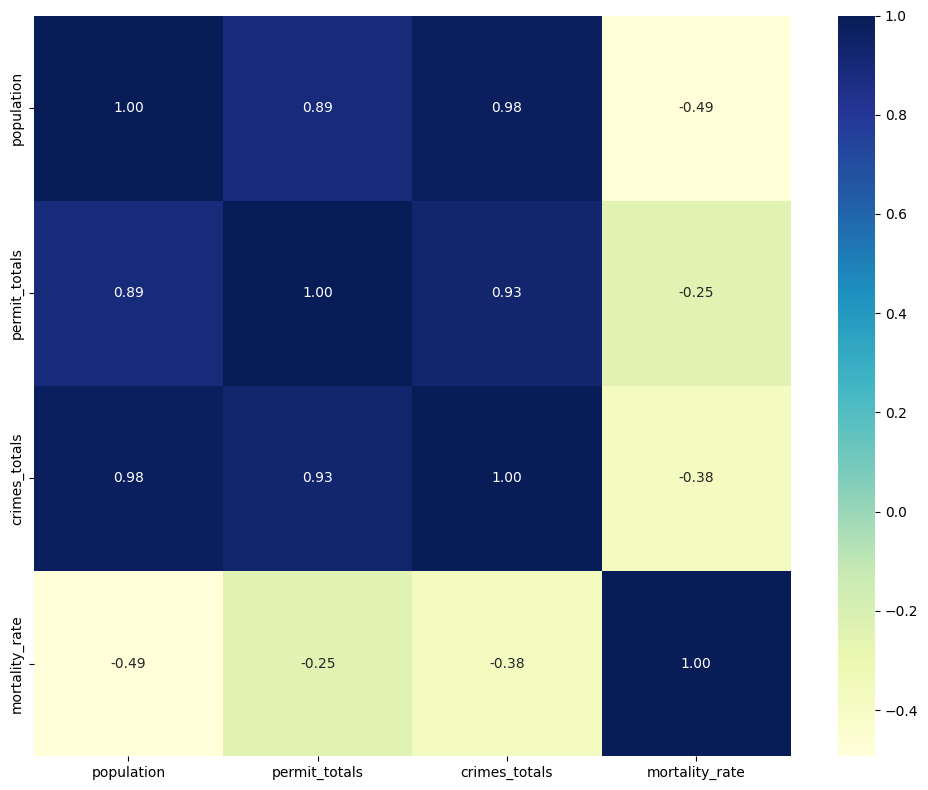

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Select numeric columns you want to analyze
numeric_cols = [
        "population",
        "permit_totals",
        "crimes_totals",
        "mortality_rate",
]

# 2) Create correlation matrix
corr_matrix = pop_permit_df[numeric_cols].corr()

# 3) Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.tight_layout()
plt.show()


Interpretation:
*   Solid points:
1. negative correlation: `permit_totals` and `mortality_rate` -> more permit, less people die bc of guns (-0.25)

*   Weak points:
2. positive correction: `permit_totals` and `crimes_totals` = 0.93

## Time-Series Line Plot Over the Years


### Single Metric for Each State


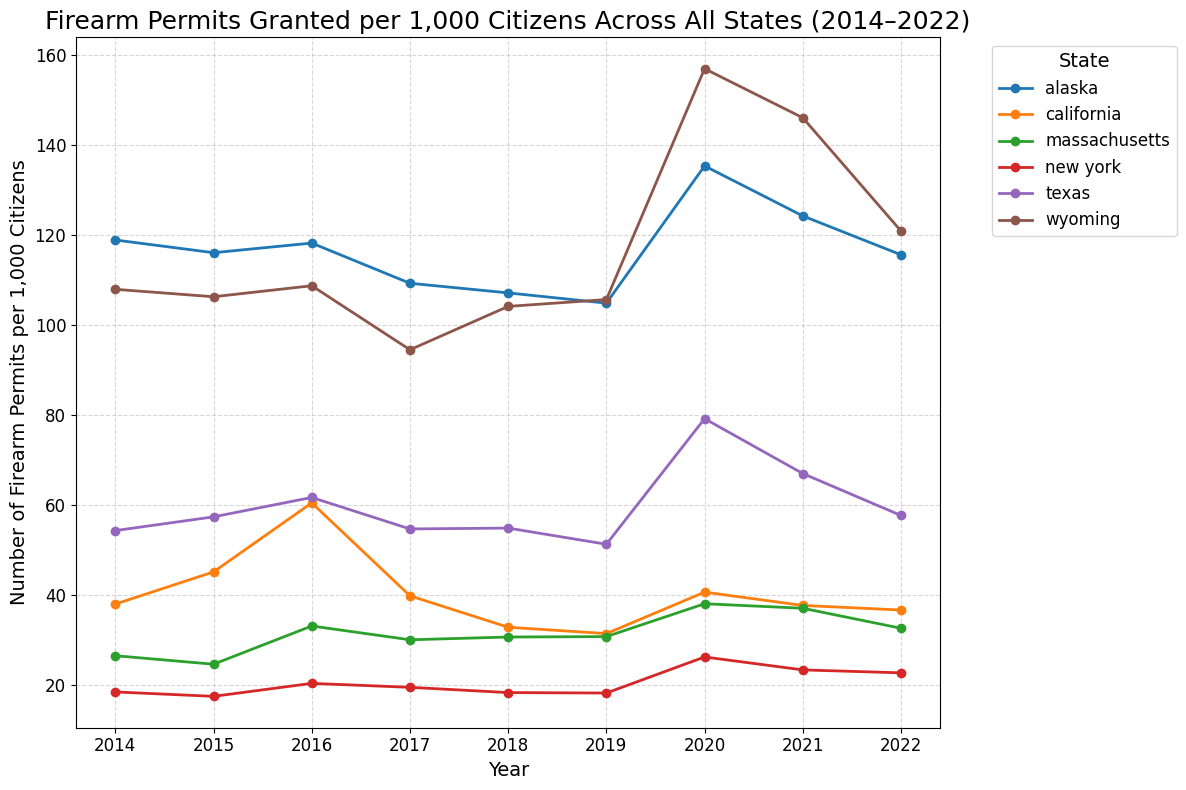

In [18]:
plt.figure(figsize=(12, 8))

# Pivot: rows = year, columns = state, values = crimes_per_1k
plot_df = pop_permit_df.pivot(index="year", columns="state", values="permit_per_1k")

# Pandas can plot each column (state) as a separate line
# Plot each state's line
plot_df.plot(ax=plt.gca(), marker="o", linewidth=2)
plt.title("Firearm Permits Granted per 1,000 Citizens Across All States (2014–2022)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Firearm Permits per 1,000 Citizens", fontsize=14)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


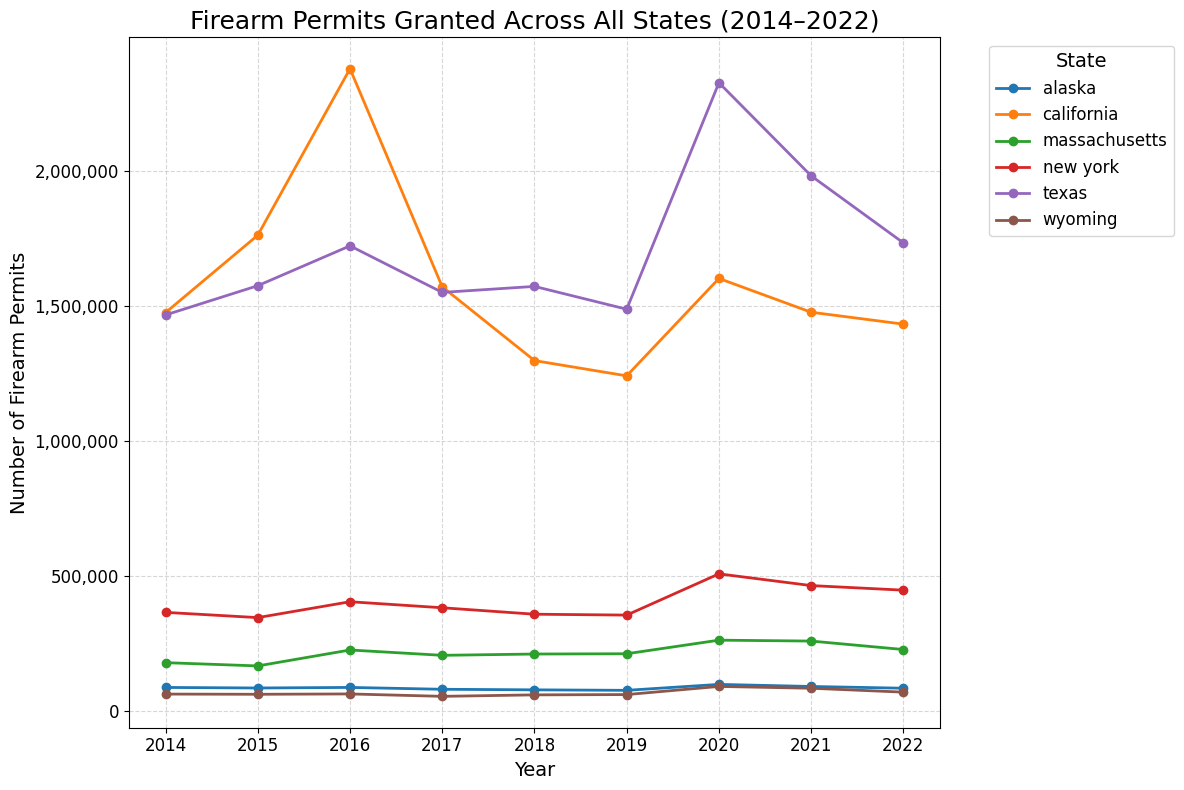

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 8))

# Pivot: rows = year, columns = state, values = permit_totals
plot_df = pop_permit_df.pivot(index="year", columns="state", values="permit_totals")

# Plot each state's line
plot_df.plot(ax=plt.gca(), marker="o", linewidth=2)


plt.title("Firearm Permits Granted Across All States (2014–2022)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Firearm Permits", fontsize=14)


plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)

# Tick Label Sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Disable scientific notation on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Alternatively, format y-axis labels with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


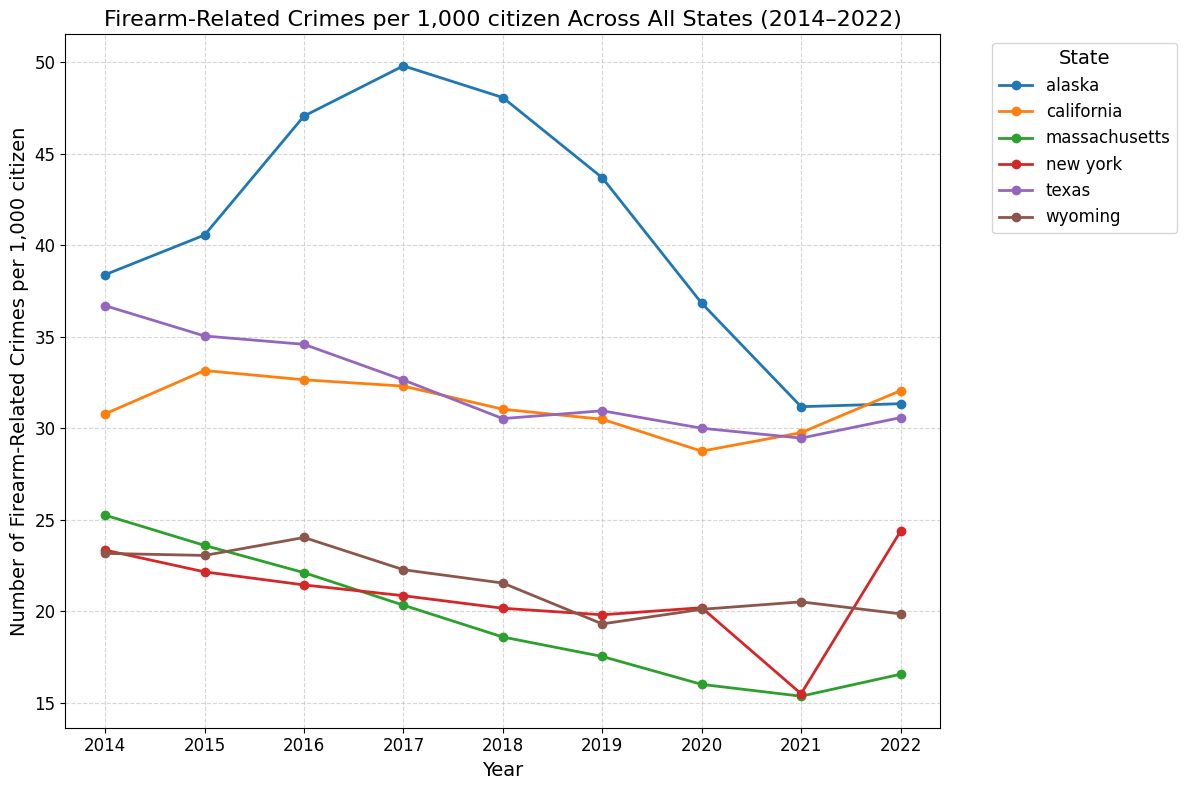

In [20]:
plt.figure(figsize=(12, 8))

# Pivot: rows = year, columns = state, values = crimes_per_1k
plot_df = pop_permit_df.pivot(index="year", columns="state", values="crimes_per_1k")

# Pandas can plot each column (state) as a separate line
# Plot each state's line
plot_df.plot(ax=plt.gca(), marker="o", linewidth=2)
plt.title("Firearm-Related Crimes per 1,000 citizen Across All States (2014–2022)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Firearm-Related Crimes per 1,000 citizen", fontsize=14)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)

#  Tick Label Sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


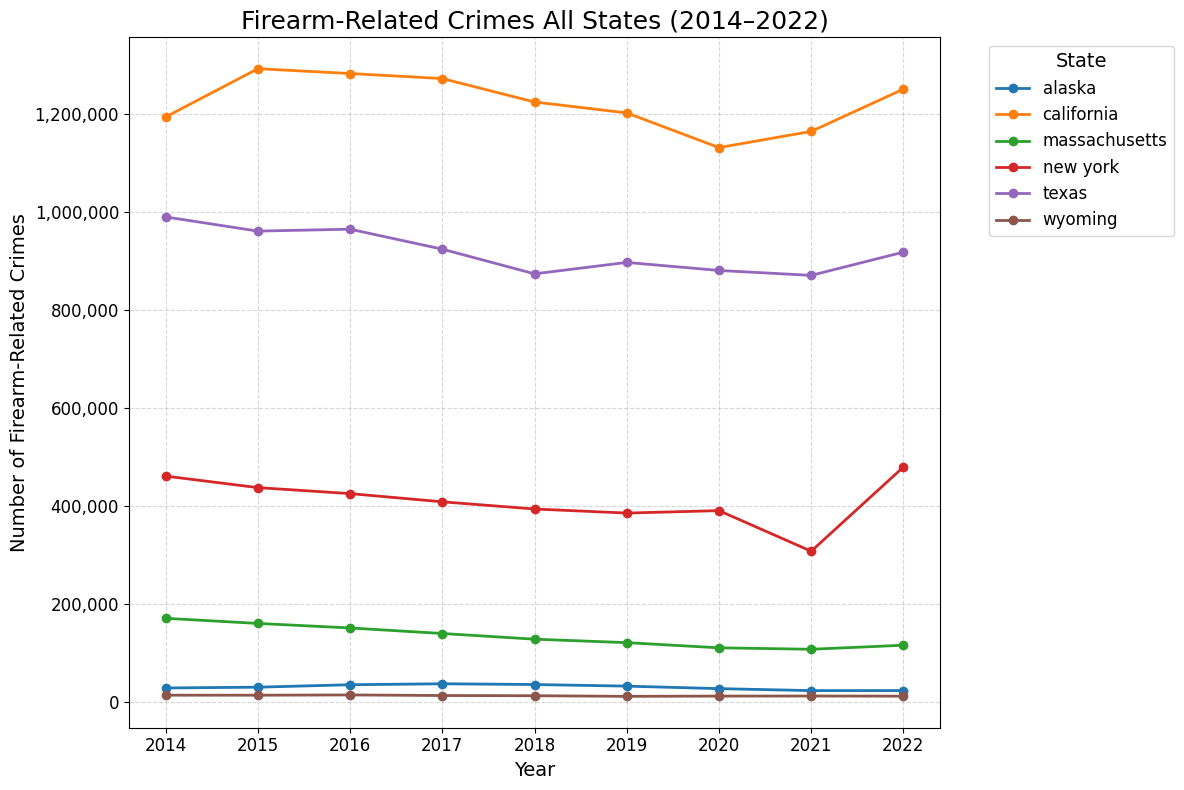

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 8))

# Pivot: rows = year, columns = state, values = permit_totals
plot_df = pop_permit_df.pivot(index="year", columns="state", values="crimes_totals")

# Plot each state's line
plot_df.plot(ax=plt.gca(), marker="o", linewidth=2)

# titles and labels
plt.title("Firearm-Related Crimes All States (2014–2022)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Firearm-Related Crimes", fontsize=14)


plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)

#  Tick Label Sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# scientific notation on y-axis
plt.ticklabel_format(style='plain', axis='y')

# Alternatively, format y-axis labels with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


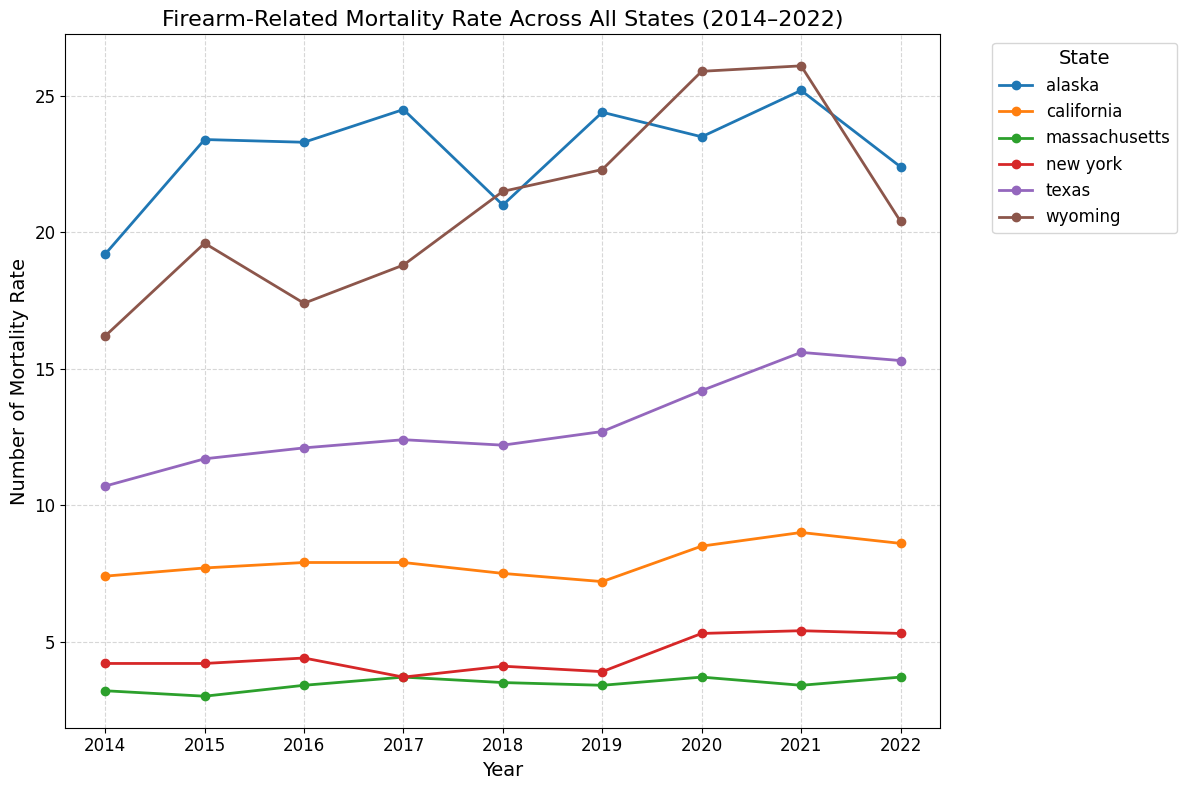

In [22]:
  plt.figure(figsize=(12, 8))

# Pivot: rows = year, columns = state, values = crimes_per_1k
plot_df = pop_permit_df.pivot(index="year", columns="state", values="mortality_rate")

# plot each column (state) as a separate line
# Plot each state's line
plot_df.plot(ax=plt.gca(), marker="o", linewidth=2)
plt.title("Firearm-Related Mortality Rate Across All States (2014–2022)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Mortality Rate", fontsize=14)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)

#  Tick Label Sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Multiple Metrics for Every State
to compare `permit_per_1k` and `crimes_per_1k` for a single state over time:

*   See whether `crimes_per_1k` and `permit_per_1k` are trending up or down in tandem or diverging.
*    add `mortality_rate` as a third line




<Figure size 1400x1000 with 0 Axes>

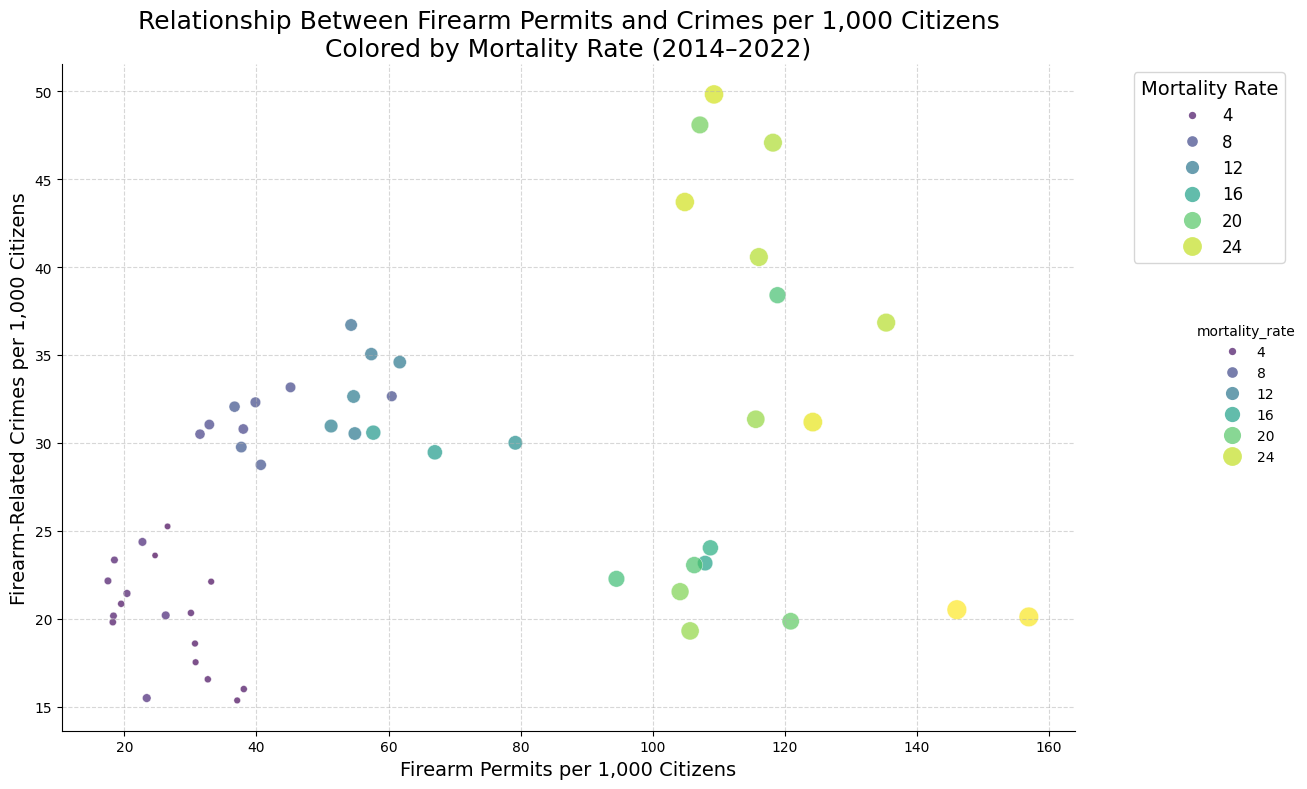

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Ensure 'pop_permit_df' contains 'year', 'state', 'permit_per_1k', 'crimes_per_1k', 'mortality_rate'

plt.figure(figsize=(14, 10))

sns.relplot(
    data=pop_permit_df,
    x="permit_per_1k",
    y="crimes_per_1k",
    hue="mortality_rate",
    size="mortality_rate",  #  size represents mortality rate
    sizes=(20, 200),        #  size range
    palette="viridis",
    alpha=0.7,
    edgecolor="w",
    height=8,
    aspect=1.5
)

plt.title("Relationship Between Firearm Permits and Crimes per 1,000 Citizens\nColored by Mortality Rate (2014–2022)", fontsize=18)
plt.xlabel("Firearm Permits per 1,000 Citizens", fontsize=14)
plt.ylabel("Firearm-Related Crimes per 1,000 Citizens", fontsize=14)

# Format y-axis to include commas
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.legend(title="Mortality Rate", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    pop_permit_df,
    x="permit_per_1k",
    y="crimes_per_1k",
    color="mortality_rate",
    size="mortality_rate",
    hover_data=["state", "year"],
    title="Firearm Permits vs. Crimes per 1,000 Citizens Colored by Mortality Rate (2014–2022)",
    labels={
        "permit_per_1k": "Firearm Permits per 1,000 Citizens",
        "crimes_per_1k": "Firearm-Related Crimes per 1,000 Citizens",
        "mortality_rate": "Mortality Rate per 1,000 Citizens"
    },
    color_continuous_scale="Viridis",
    size_max=15
)

fig.update_layout(
    legend_title="Mortality Rate",
    xaxis_title="Firearm Permits per 1,000 Citizens",
    yaxis_title="Firearm-Related Crimes per 1,000 Citizens",
    title_font_size=20
)

fig.show()


NameError: name 'g' is not defined

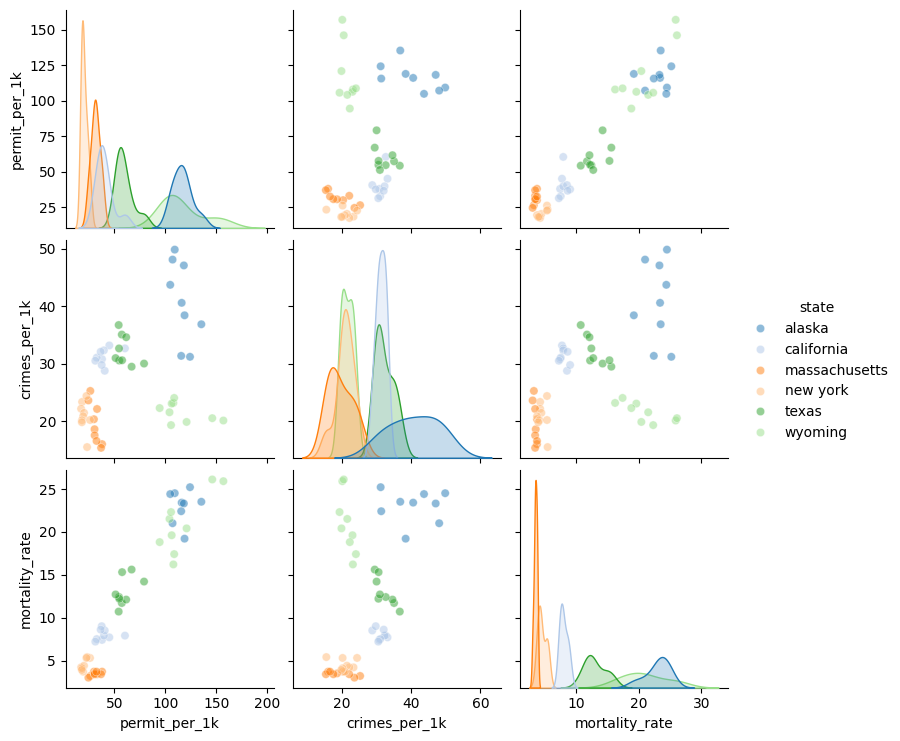

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
pair_plot_df = pop_permit_df[['permit_per_1k', 'crimes_per_1k', 'mortality_rate', 'state']]

# Create a pair plot with hue as 'state'
sns.pairplot(
    pair_plot_df,
    hue="state",
    palette="tab20",
    markers='o',
    diag_kind='kde',
    plot_kws={'alpha':0.5}
)

# Safely remove the legend
if hasattr(g, '_legend') and g._legend is not None:
    g._legend.remove()

plt.suptitle("Pairwise Relationships Among Firearm Metrics by State (2014–2022)", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


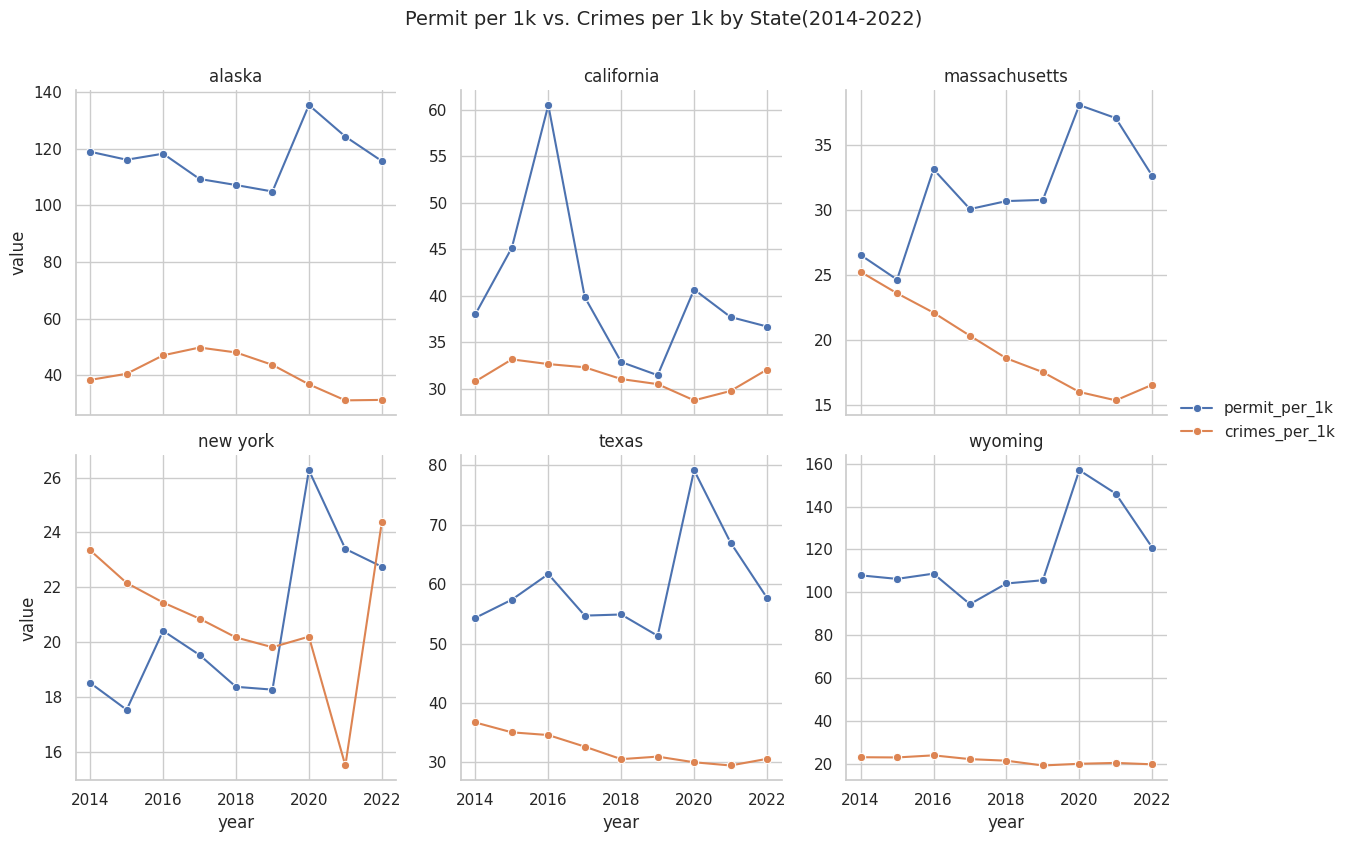

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Melt (reshape) the DataFrame so "permit_per_1k" and "crimes_per_1k" become a single column
melted = pop_permit_df.melt(
    id_vars=["year", "state"],
    value_vars=["permit_per_1k", "crimes_per_1k"],
    var_name="metric",
    value_name="value"
)

# Create a FacetGrid: one subplot per state, multiple columns
g = sns.FacetGrid(
    melted,
    col="state",
    col_wrap=3,  # adjust this (3 subplots per row)
    height=4,
    sharey=False  # let each subplot have its own y-scale
)

# Draw a lineplot for each subplot
g.map_dataframe(
    sns.lineplot,
    x="year",
    y="value",
    hue="metric",
    marker="o"
)

# Manage legends and titles
g.add_legend()
g.set_titles("{col_name}")
g.fig.suptitle("Permit per 1k vs. Crimes per 1k by State(2014-2022)", y=1.05, fontsize=14)
plt.show()
